# Aula 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

In [2]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    '''
    Formata os dados para cada Milhão e mostra duas casas decimais depois da vírgula
    '''
    return "%.2f Mi" % (x/1E6)

In [3]:
#dados referentes aos valores hospitalares gastos e valores hospitalares gastos corrigidos com o IPCA
dados = pd.read_csv("https://raw.githubusercontent.com/Pedro-correa-almeida/Bootcamp_alura/main/Modulo_2/dados/A084054189_28_143_208_valor_total.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    na_values='-',
                    thousands=".", decimal=",", engine="python")
pop_2020 = pd.read_csv('https://raw.githubusercontent.com/Pedro-correa-almeida/Bootcamp_alura/main/Modulo_2/dados/populacao_2020')

In [4]:
dados_2020 = dados.rename(columns={'Unidade da Federação':'uf'})
dados_2020 = dados_2020.set_index('uf')
dados_2020.index = dados_2020.index.str[3:]
dados_2020 = dados_2020[dados_2020.columns[dados_2020.columns.str.contains('2020')]]
dados_2020

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
uf,,,,,,,,,,,,
Rondônia,9.222011e+06,7.493901e+06,8.148169e+06,7.353768e+06,7.739864e+06,9.246098e+06,1.182469e+07,1.173331e+07,1.020199e+07,7.955139e+06,9.357946e+06,8.880837e+06
Acre,3.331804e+06,3.417691e+06,3.076003e+06,2.286643e+06,2.896340e+06,3.045246e+06,3.915193e+06,3.640143e+06,3.391242e+06,4.044321e+06,3.276590e+06,3.696997e+06
Amazonas,1.606345e+07,1.493998e+07,1.510706e+07,1.353466e+07,1.969875e+07,2.112939e+07,1.976946e+07,1.805993e+07,1.784102e+07,1.640832e+07,1.989562e+07,1.776517e+07
Roraima,3.059824e+06,2.912520e+06,2.937346e+06,2.868821e+06,2.752228e+06,3.401864e+06,3.015488e+06,2.826486e+06,2.928044e+06,3.090314e+06,3.621031e+06,3.454461e+06
Pará,3.436599e+07,3.741758e+07,3.561033e+07,2.829245e+07,3.299881e+07,4.219275e+07,4.080413e+07,4.438572e+07,3.682025e+07,3.696593e+07,3.900432e+07,3.801515e+07
Amapá,2.333823e+06,2.310196e+06,1.842473e+06,1.705874e+06,2.065055e+06,2.009913e+06,3.253399e+06,2.946398e+06,2.416019e+06,2.203732e+06,2.218532e+06,2.566920e+06
Tocantins,8.098082e+06,7.024599e+06,7.210345e+06,6.391194e+06,6.707978e+06,7.424638e+06,9.155572e+06,8.390268e+06,8.729632e+06,7.770886e+06,5.278405e+05,6.752771e+05
Maranhão,3.032487e+07,3.001819e+07,2.930989e+07,2.525659e+07,3.135692e+07,3.486848e+07,3.547349e+07,3.221904e+07,3.007715e+07,3.320078e+07,3.194267e+07,3.078340e+07
Piauí,1.622947e+07,1.685133e+07,1.456825e+07,1.222439e+07,1.318221e+07,1.528207e+07,1.990857e+07,2.566354e+07,2.023078e+07,2.238922e+07,1.891160e+07,2.088397e+07


In [5]:
pop_2020 = pop_2020.set_index('uf')
dados_x_pop = pop_2020.join(dados_2020)
dados_x_pop

,populacao,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
uf,,,,,,,,,,,,,
São Paulo,46289333,3.045117e+08,2.888723e+08,2.973597e+08,2.513317e+08,2.724934e+08,3.067683e+08,3.676490e+08,3.499010e+08,3.541173e+08,3.457331e+08,3.350849e+08,3.304890e+08
Minas Gerais,21292666,1.592805e+08,1.502371e+08,1.428973e+08,1.334167e+08,1.335148e+08,1.399438e+08,1.657600e+08,1.710481e+08,1.754397e+08,1.782792e+08,1.752532e+08,1.725094e+08
Rio de Janeiro,17366189,8.318626e+07,7.611620e+07,7.700464e+07,7.140462e+07,8.512366e+07,9.173536e+07,9.933135e+07,9.633962e+07,8.830524e+07,8.699565e+07,8.677650e+07,9.041673e+07
Bahia,14930634,7.299164e+07,7.007618e+07,7.315646e+07,6.267316e+07,6.407544e+07,6.968651e+07,8.420499e+07,8.347808e+07,8.054032e+07,8.125083e+07,8.625781e+07,8.587112e+07
Paraná,11516840,1.223575e+08,1.270102e+08,1.173170e+08,9.460454e+07,1.075062e+08,9.698198e+07,1.097207e+08,1.295292e+08,1.227023e+08,1.296479e+08,1.268591e+08,1.200371e+08
Rio Grande do Sul,11422973,9.490834e+07,9.143794e+07,1.028761e+08,8.300032e+07,8.238177e+07,8.609250e+07,1.005793e+08,1.026100e+08,1.044010e+08,1.174583e+08,1.088539e+08,1.117605e+08
Pernambuco,9616621,7.016144e+07,6.482262e+07,6.622173e+07,4.924143e+07,5.898824e+07,6.430158e+07,7.491468e+07,7.723288e+07,7.171568e+07,6.655563e+07,7.890418e+07,7.097805e+07
Ceará,9187103,5.063058e+07,5.072507e+07,4.700999e+07,4.504854e+07,4.643063e+07,5.499144e+07,5.601951e+07,6.171949e+07,5.662592e+07,5.907460e+07,5.691650e+07,5.084935e+07
Pará,8690745,3.436599e+07,3.741758e+07,3.561033e+07,2.829245e+07,3.299881e+07,4.219275e+07,4.080413e+07,4.438572e+07,3.682025e+07,3.696593e+07,3.900432e+07,3.801515e+07


In [6]:
for column in dados_x_pop.columns[1:]:
    dados_x_pop[f'{column}_per_capita'] = dados_x_pop[column]/dados_x_pop['populacao']

In [7]:
dados_x_pop

,populacao,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,...,2020/Mar_per_capita,2020/Abr_per_capita,2020/Mai_per_capita,2020/Jun_per_capita,2020/Jul_per_capita,2020/Ago_per_capita,2020/Set_per_capita,2020/Out_per_capita,2020/Nov_per_capita,2020/Dez_per_capita
uf,,,,,,,,,,,,,,,,,,,,,
São Paulo,46289333,3.045117e+08,2.888723e+08,2.973597e+08,2.513317e+08,2.724934e+08,3.067683e+08,3.676490e+08,3.499010e+08,3.541173e+08,...,6.423935,5.429580,5.886742,6.627193,7.942413,7.558998,7.650083,7.468958,7.238922,7.139637
Minas Gerais,21292666,1.592805e+08,1.502371e+08,1.428973e+08,1.334167e+08,1.335148e+08,1.399438e+08,1.657600e+08,1.710481e+08,1.754397e+08,...,6.711106,6.265852,6.270460,6.572393,7.784838,8.033193,8.239442,8.372796,8.230685,8.101824
Rio de Janeiro,17366189,8.318626e+07,7.611620e+07,7.700464e+07,7.140462e+07,8.512366e+07,9.173536e+07,9.933135e+07,9.633962e+07,8.830524e+07,...,4.434170,4.111704,4.901689,5.282412,5.719813,5.547539,5.084895,5.009484,4.996865,5.206481
Bahia,14930634,7.299164e+07,7.007618e+07,7.315646e+07,6.267316e+07,6.407544e+07,6.968651e+07,8.420499e+07,8.347808e+07,8.054032e+07,...,4.899756,4.197622,4.291542,4.667351,5.639747,5.591061,5.394300,5.441888,5.777237,5.751338
Paraná,11516840,1.223575e+08,1.270102e+08,1.173170e+08,9.460454e+07,1.075062e+08,9.698198e+07,1.097207e+08,1.295292e+08,1.227023e+08,...,10.186563,8.214453,9.334696,8.420885,9.526976,11.246941,10.654161,11.257244,11.015092,10.422743
Rio Grande do Sul,11422973,9.490834e+07,9.143794e+07,1.028761e+08,8.300032e+07,8.238177e+07,8.609250e+07,1.005793e+08,1.026100e+08,1.044010e+08,...,9.006073,7.266087,7.211938,7.536786,8.805001,8.982772,9.139566,10.282638,9.529384,9.783837
Pernambuco,9616621,7.016144e+07,6.482262e+07,6.622173e+07,4.924143e+07,5.898824e+07,6.430158e+07,7.491468e+07,7.723288e+07,7.171568e+07,...,6.886174,5.120450,6.133988,6.686504,7.790125,8.031187,7.457472,6.920895,8.204979,7.380768
Ceará,9187103,5.063058e+07,5.072507e+07,4.700999e+07,4.504854e+07,4.643063e+07,5.499144e+07,5.601951e+07,6.171949e+07,5.662592e+07,...,5.116954,4.903455,5.053893,5.985722,6.097625,6.718058,6.163632,6.430166,6.195261,5.534863
Pará,8690745,3.436599e+07,3.741758e+07,3.561033e+07,2.829245e+07,3.299881e+07,4.219275e+07,4.080413e+07,4.438572e+07,3.682025e+07,...,4.097500,3.255468,3.797006,4.854906,4.695124,5.107239,4.236720,4.253482,4.488029,4.374210


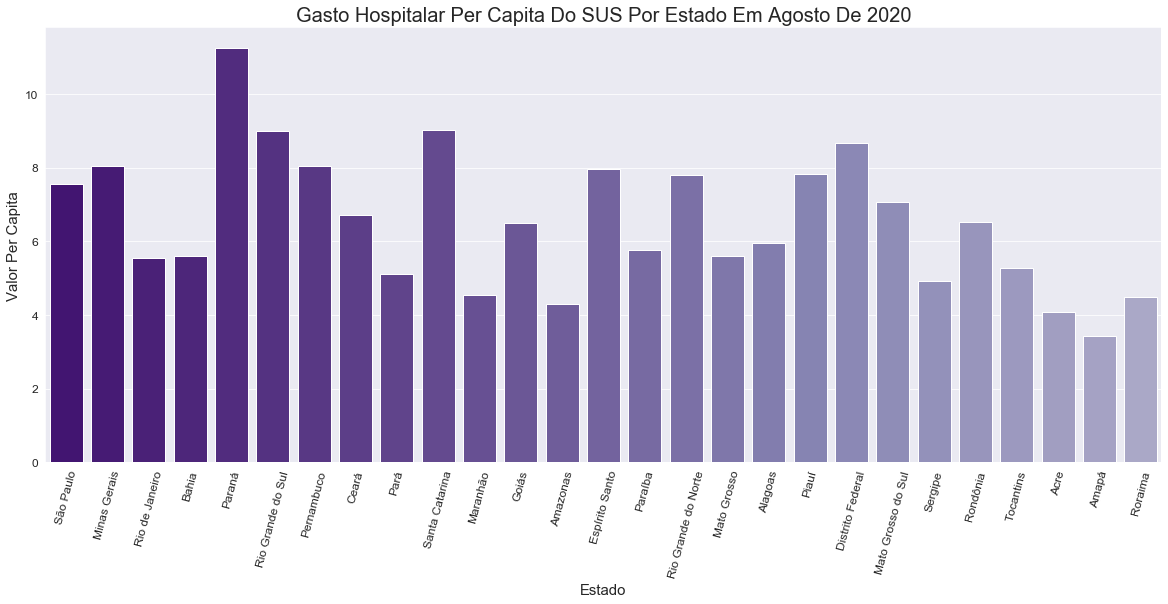

In [8]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')
    
#Criando uma palheta de cores
sns.set_palette(list(reversed(sns.color_palette('Purples', 50))))

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(20,8)) 

#Criando o gráfico
sns.barplot(x='uf', y='2020/Ago_per_capita', data=dados_x_pop.reset_index())

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Gasto Hospitalar Per Capita Do SUS Por Estado Em Agosto De 2020', fontsize=20)
plt.xlabel('Estado', fontsize=15)
plt.ylabel('Valor Per Capita', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=75)

#Mostrando o gráfico
plt.show()

## Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

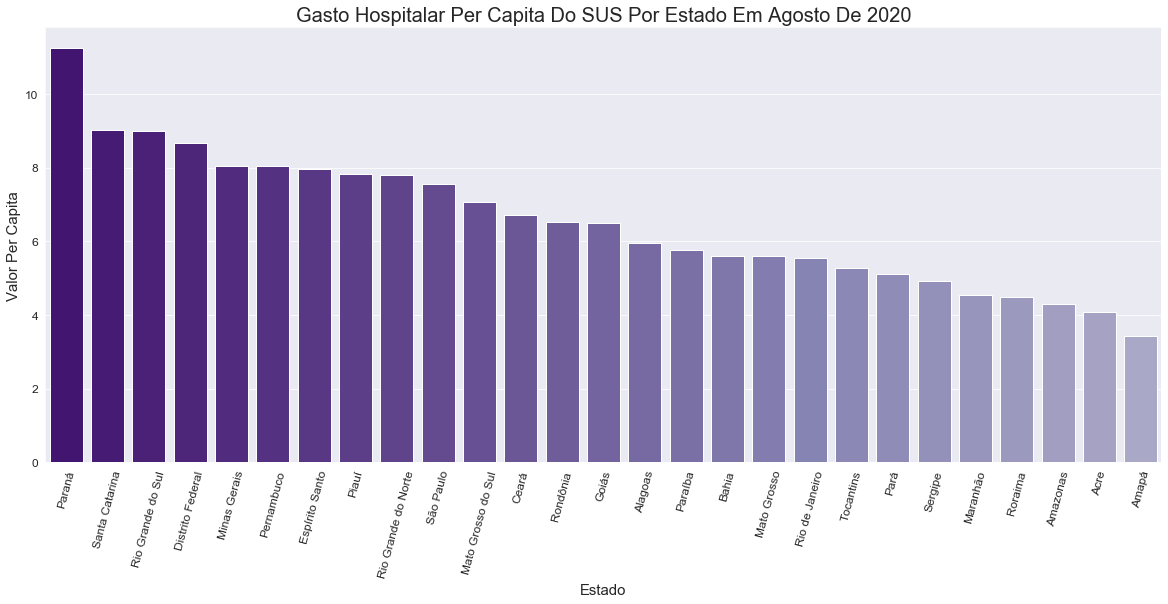

In [9]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')
    
#Criando uma palheta de cores
sns.set_palette(list(reversed(sns.color_palette('Purples', 50))))

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(20,8)) 

#Criando o gráfico
sns.barplot(x='uf', y='2020/Ago_per_capita', data=dados_x_pop.sort_values('2020/Ago_per_capita', ascending=False).reset_index())

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Gasto Hospitalar Per Capita Do SUS Por Estado Em Agosto De 2020', fontsize=20)
plt.xlabel('Estado', fontsize=15)
plt.ylabel('Valor Per Capita', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=75)

#Mostrando o gráfico
plt.show()

## Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

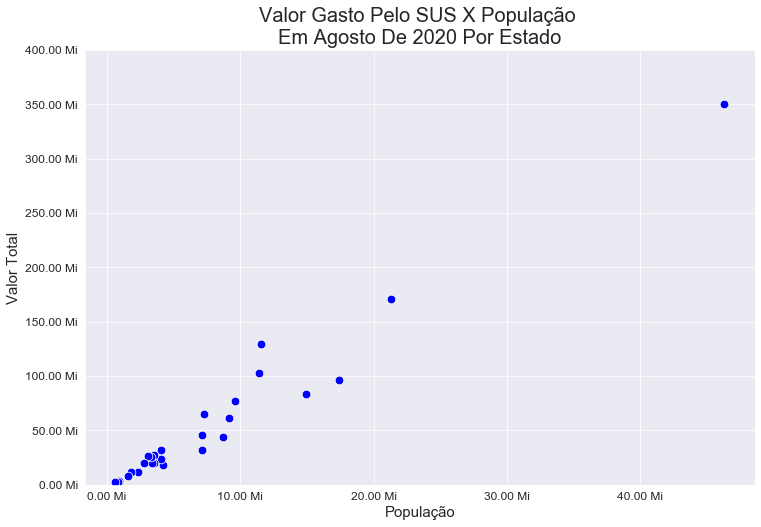

In [26]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Criando o gráfico
sns.scatterplot(x='populacao', y='2020/Ago', data=dados_x_pop.reset_index(), color='b', s=75)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Valor Gasto Pelo SUS X População \nEm Agosto De 2020 Por Estado', fontsize=20)
plt.xlabel('População', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 400000000)
ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_major_formatter(million_formatter)

#Mostrando o gráfico
plt.show()

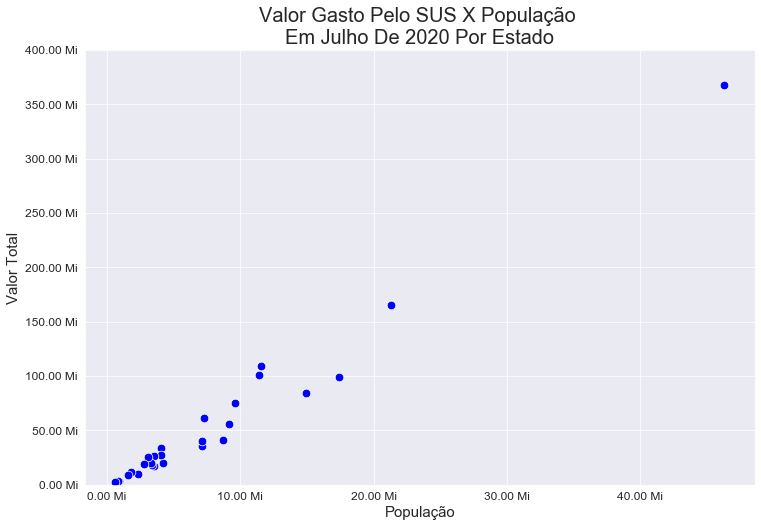

In [25]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')
    
#Criando uma palheta de cores
sns.set_palette(list(reversed(sns.color_palette('Purples', 50))))

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Criando o gráfico
sns.scatterplot(x='populacao', y='2020/Jul', data=dados_x_pop.reset_index(), color='b', s=75)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Valor Gasto Pelo SUS X População \nEm Julho De 2020 Por Estado', fontsize=20)
plt.xlabel('População', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 400000000)
ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_major_formatter(million_formatter)

#Mostrando o gráfico
plt.show()

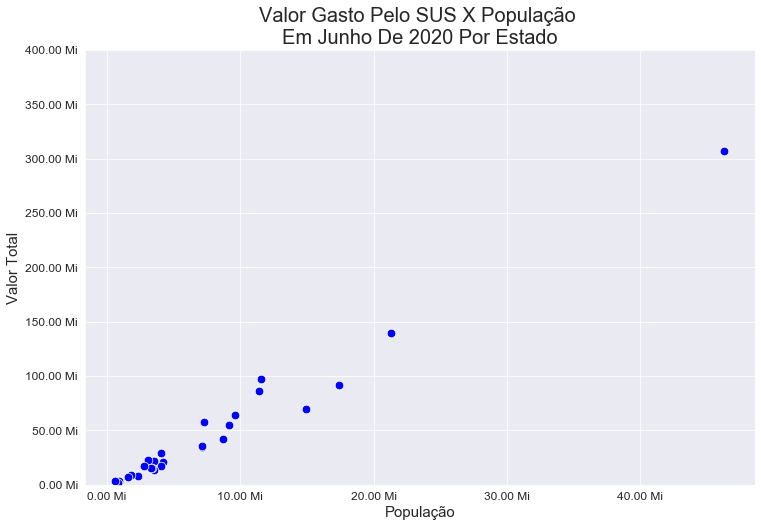

In [24]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')
    
#Criando uma palheta de cores
sns.set_palette(list(reversed(sns.color_palette('Purples', 50))))

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Criando o gráfico
sns.scatterplot(x='populacao', y='2020/Jun', data=dados_x_pop.reset_index(), color='b', s=75)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Valor Gasto Pelo SUS X População \nEm Junho De 2020 Por Estado', fontsize=20)
plt.xlabel('População', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 400000000)
ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_major_formatter(million_formatter)

#Mostrando o gráfico
plt.show()

Observando os gráficos de agosto, julho e junho de 2020 percebe se que há sempre o mesmo padrão na relação de população e o gasto, o que comprova a hipótese que essas duas variáveis estão completamente interligados, uma vez que todos os gráficos tem os mesmos dados de população, variando apenas o valor gasto, percebe se que em todos os meses a relação dessas duas variáveis se comportaram bem parecidas.

## Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês atual, analisar e compartilhar suas hipóteses

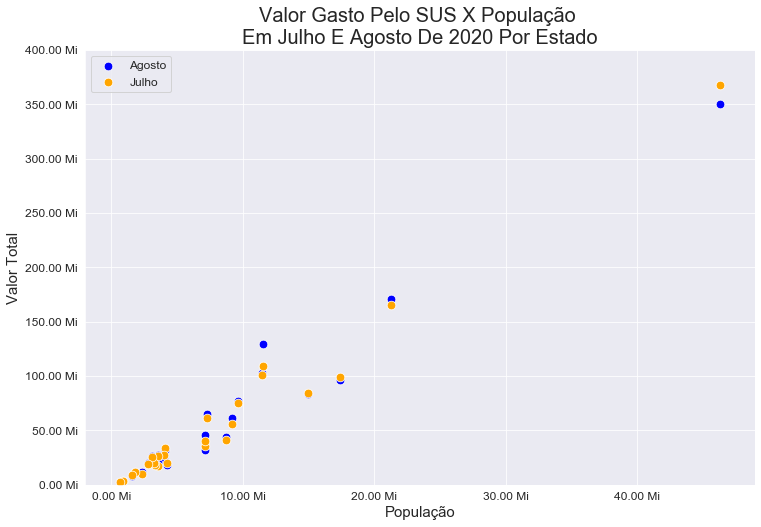

In [23]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Criando o gráfico
sns.scatterplot(x='populacao', y='2020/Ago', data=dados_x_pop.reset_index(), color='b', label='Agosto', s=75)
sns.scatterplot(x='populacao', y='2020/Jul', data=dados_x_pop.reset_index(), color='orange', label='Julho', s=75)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Valor Gasto Pelo SUS X População \nEm Julho E Agosto De 2020 Por Estado', fontsize=20)
plt.xlabel('População', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 400000000)
ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_major_formatter(million_formatter)
plt.legend(fontsize=12)

#Mostrando o gráfico
plt.show()

Agora com os dados de agosto e julho no mesmo gráfico fica claro a relação dessas duas variáveis, em que nesses dois meses os gastos foram muito parecidos de acordo com a população.

## Desafio 04 : Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados

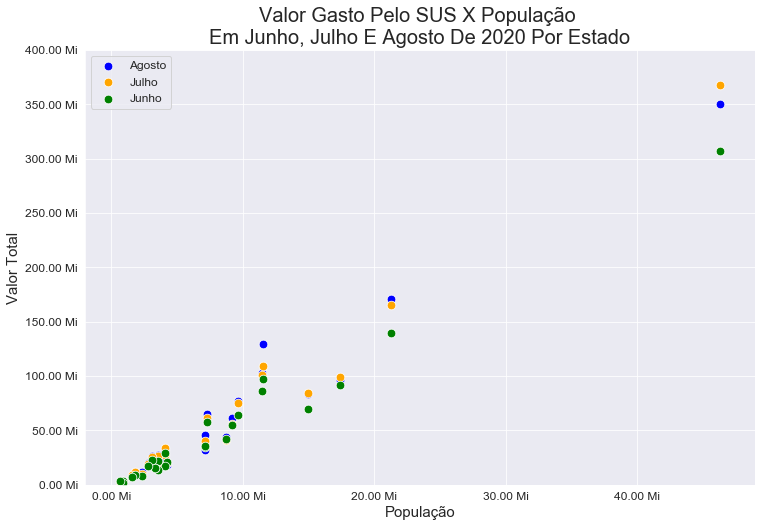

In [27]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Criando o gráfico
sns.scatterplot(x='populacao', y='2020/Ago', data=dados_x_pop.reset_index(), color='b', label='Agosto',  s=75)
sns.scatterplot(x='populacao', y='2020/Jul', data=dados_x_pop.reset_index(), color='orange', label='Julho',  s=75)
sns.scatterplot(x='populacao', y='2020/Jun', data=dados_x_pop.reset_index(), color='green', label='Junho',  s=75)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Valor Gasto Pelo SUS X População \nEm Junho, Julho E Agosto De 2020 Por Estado', fontsize=20)
plt.xlabel('População', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 400000000)
ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_major_formatter(million_formatter)
plt.legend(fontsize=12)
plt.savefig('valor_gasto_pop_20')

#Mostrando o gráfico
plt.show()

A partir da análise do gráfico nota se que o mês de junho houve um gasto menor que agosto e julho parece que para quase todos os estados, principalmente para os estados com mais população, como São Paulo, eu acredito que isso pode ter alguma relação com a pandemia do Covid-19, podendo ser um indicativo que os casos da doença aumentaram em julho e agosto.